In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
chatpath=r"WhatsApp Chat.txt"
file= open(chatpath,encoding='utf-8')
chat=file.read()

In [8]:
chat.split('\n')

['2/5/25, 00:09 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '2/5/25, 12:30 - Bksahu: null',
 '2/5/25, 17:04 - Shiva Sai Srinivas Billa: Ye wala gaadi dilao @917330830036',
 '2/5/25, 17:04 - Shiva Sai Srinivas Billa: null',
 '2/5/25, 17:05 - Bksahu: Baarish hora ab😱',
 '2/5/25, 17:05 - Shiva Sai Srinivas Billa: Agar ye dilayi tho me tuje thar dilaunga',
 '2/5/25, 17:05 - Shiva Sai Srinivas Billa: Ha Thoda Sa',
 '2/5/25, 17:06 - Bksahu: I am poor😣',
 '2/5/25, 17:06 - Shiva Sai Srinivas Billa: 🥺',
 '2/5/25, 17:06 - Shiva Sai Srinivas Billa: Dilado B2',
 '2/5/25, 17:06 - Shiva Sai Srinivas Billa: 😙',
 '2/5/25, 17:07 - Bksahu: 🤫',
 '2/5/25, 17:07 - Bksahu: 🙂\u200d↔️',
 '2/5/25, 17:07 - Shiva Sai Srinivas Billa: 😿',
 '2/5/25, 17:11 - Tejashh Raj: Areyyy🤦🏼\u200d♂️',
 '2/5/25, 17:11 - Tejashh Raj: Tun dono separte chat karo re.. kya sataare dono',
 '2/5/25, 17:12 - Bksahu: 😡',
 '2/5/25, 17:12 -

In [122]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}'
import re
date=re.findall(pattern,chat)
date=[x.replace(" - ","") for x in date]

text=re.split(pattern,chat)[1:]
text=[x.replace(" - ","") for x in text]

In [123]:
df=pd.DataFrame({'date':date,'text':text})
df['date']=pd.to_datetime(df['date'],format='%m/%d/%y, %H:%M')
df

,date,text
0,2025-02-05 00:09:00,Messages and calls are end-to-end encrypted. N...
1,2025-02-05 12:30:00,Bksahu: null\n
2,2025-02-05 17:04:00,Shiva Sai Srinivas Billa: Ye wala gaadi dilao ...
3,2025-02-05 17:04:00,Shiva Sai Srinivas Billa: null\n
4,2025-02-05 17:05:00,Bksahu: Baarish hora ab😱\n
...,...,...
358,2025-02-17 15:23:00,Shiva Sai Srinivas Billa: Kab Diya\n
359,2025-02-17 15:24:00,Bksahu: Yee\n
360,2025-02-17 15:33:00,Shiva Sai Srinivas Billa: No\n
361,2025-02-17 15:34:00,Bksahu: What no\n


In [128]:
name=[]
message=[]
for i in df['text']:
    pattern='([\w\W]+?):\s'
    if re.findall(pattern,i):
        name.append(re.split(pattern,i)[1])
        message.append(re.split(pattern,i)[2])

    else:
        name.append('group_notification')
        message.append(i)
df['user']=name
df['message']=message

df.drop(columns=['text'],inplace=True)

In [ ]:
str='<This message was edited>'

In [131]:
count=0
for i in df['message']:
    count+=1
    print(count,i)

1 Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

2 null

3 Ye wala gaadi dilao @917330830036

4 null

5 Baarish hora ab😱

6 Agar ye dilayi tho me tuje thar dilaunga

7 Ha Thoda Sa

8 I am poor😣

9 🥺

10 Dilado B2

11 😙

12 🤫

13 🙂‍↔️

14 😿

15 Areyyy🤦🏼‍♂️

16 Tun dono separte chat karo re.. kya sataare dono

17 😡

18 Nai toh me exit ho jaunga

19 👍🏼🏃🏻‍♀️

20 7013460833

21 ??

22 🐈🐕🐃

23 👀

24 Kiska no. Hai

25 Uska hi number he😂🤣

26 🐕

27 Malla kukka enduk ochindi ey 😡

28 🐕

29 🤭

30 Bhak

31 <Media omitted>

32 😂

33 🐕

34 🤯🤬

35 <Media omitted>

36 <Media omitted>

37 <Media omitted>

38 😂😂😂

39 That look tho 😂

40 This is that dog from Shaun the sheep, right?

41 Shaun the sheep kadha

42 Was asking the same

43 Good OG show

44 Yep

45 Love that show

46 👀

47 😂

48 Tere generation ka show nahi he B2

49 👍🏻

50 <Media omitted>

51 <Media omitted>

52 Meowwwwww 🤣

53 <Media omitted>

54 

In [132]:
df['message'][173]

'Tu Bhi Mere Saath Thi Tho Muje Kyu Gaali Deri Abi 🤨 <This message was edited>\n'

In [127]:
# extracting day, month, year, hour, minute

df['year']=df['date'].dt.year
df['month']=df['date'].dt.month_name()
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [14]:
df.sample(5)

,date,user,message,year,month,day,hour,minute
88,2025-02-07 13:57:00,Bksahu,<Media omitted>\n,2025,February,7,13,57
356,2025-02-17 15:22:00,Shiva Sai Srinivas Billa,Tho de muje\n,2025,February,17,15,22
126,2025-02-07 14:07:00,Bksahu,😁\n,2025,February,7,14,7
351,2025-02-17 15:21:00,Tejashh Raj,😒\n,2025,February,17,15,21
242,2025-02-11 16:04:00,Tejashh Raj,Woh FIR file karegi and me witness\n,2025,February,11,16,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     363 non-null    datetime64[ns]
 1   user     363 non-null    object        
 2   message  363 non-null    object        
 3   year     363 non-null    int64         
 4   month    363 non-null    object        
 5   day      363 non-null    int64         
 6   hour     363 non-null    int64         
 7   minute   363 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 22.8+ KB


In [16]:
df[df['message']=='<Media omitted>\n'].shape[0]

44

In [17]:
userss=round(df['user'].value_counts()/df.shape[0]*100,2)

In [18]:
userss=userss.reset_index().rename(columns={'index':'user','user':'messages'})
userss

,user,messages
0,Bksahu,36.09
1,Shiva Sai Srinivas Billa,31.40
2,Tejashh Raj,28.37
3,Itachi Uchiha,2.48
4,group_notification,1.38
5,Meta AI,0.28


In [32]:
from urlextract import URLExtract

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# punctuation
# urls
# group notfication
# media
# stop words

In [34]:
import spacy

In [70]:
temp_df[temp_df['message'].isin(['null', 'null\n', ''])]

,date,user,message,year,month,day,hour,minute
184,2025-02-09 23:15:00,Meta AI,,2025,February,9,23,15


In [66]:
df

,date,user,message,year,month,day,hour,minute
0,2025-02-05 00:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2025,February,5,0,9
1,2025-02-05 12:30:00,Bksahu,null\n,2025,February,5,12,30
2,2025-02-05 17:04:00,Shiva Sai Srinivas Billa,Ye wala gaadi dilao @917330830036\n,2025,February,5,17,4
3,2025-02-05 17:04:00,Shiva Sai Srinivas Billa,null\n,2025,February,5,17,4
4,2025-02-05 17:05:00,Bksahu,Baarish hora ab😱\n,2025,February,5,17,5
...,...,...,...,...,...,...,...,...
358,2025-02-17 15:23:00,Shiva Sai Srinivas Billa,Kab Diya\n,2025,February,17,15,23
359,2025-02-17 15:24:00,Bksahu,Yee\n,2025,February,17,15,24
360,2025-02-17 15:33:00,Shiva Sai Srinivas Billa,No\n,2025,February,17,15,33
361,2025-02-17 15:34:00,Bksahu,What no\n,2025,February,17,15,34


In [75]:
temp_df=temp_df[~temp_df['message'].str.strip().isin(['null', 'null\n', ''])] 

In [120]:
# def clean_message(message):
#     doc = nlp(message)
#     tokens = [token.text for token in doc if not token.like_url and not token.is_punct]  # Remove URLs & punctuation
#     cleaned_text = " ".join(tokens)
#     cleaned_text = re.sub(r'@\d{10,}', '', cleaned_text)  
#     cleaned_text = re.sub(r'\bmessage edited\b', '', cleaned_text, flags=re.IGNORECASE)  
#     cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
#     return cleaned_text

# temp_df['message'].apply(clean_message)

df.sample(10)

,0,1
11,fafam,6
17,😹,5
19,🤦,4
13,👍,5
10,kidnap,6
9,🤬,6
12,null,5
18,b2,4
15,🐱,5
8,🤭,6


In [44]:
with open(r"stopwords_hindi-english-telugu.txt",'r') as file:
    stopwords=file.read()

temp_df=df[df['user']!='group_notification']
temp_df=temp_df[temp_df['message']!=['<Media omitted>\n']
temp_df=temp_df[~temp_df['message'].str.strip().isin(['null', 'null\n', ''])] 
#remove urls and punctuatiion
nlp=spacy.load('en_core_web_sm')

def clean_message(message):
    doc = nlp(message)
    tokens = [token.text for token in doc if not token.like_url and not token.is_punct]  # Remove URLs & punctuation
    return " ".join(tokens) 

temp_df['message']=temp_df['message'].apply(clean_message)


words=[]
for message in temp_df['message']:
    for word in message.lower().split():
        if word not in stopwords:
            words.append(word)
            
words

['null',
 'gaadi',
 'dilao',
 '@917330830036',
 'null',
 'baarish',
 'hora',
 '😱',
 'dilayi',
 'tuje',
 'dilaunga',
 '😣',
 '🥺',
 'dilado',
 'b2',
 '😙',
 '🤫',
 '🙂',
 '\u200d↔️',
 '😿',
 'areyyy',
 '🤦',
 '🏼\u200d',
 '♂',
 '️',
 'separte',
 'chat',
 'sataare',
 '😡',
 'exit',
 'jaunga',
 '👍',
 '🏼',
 '🏃',
 '🏻\u200d',
 '♀',
 '️',
 '7013460833',
 '🐈',
 '🐕',
 '🐃',
 '👀',
 'number',
 '😂',
 '🤣',
 '🐕',
 'malla',
 'kukka',
 'ochindi',
 '😡',
 '🐕',
 '🤭',
 'bhak',
 '😂',
 '🐕',
 '🤯',
 '🤬',
 '😂',
 '😂',
 '😂',
 '😂',
 'dog',
 'shaun',
 'sheep',
 'shaun',
 'sheep',
 'kadha',
 'show',
 'yep',
 'love',
 'show',
 '👀',
 '😂',
 'generation',
 'show',
 'b2',
 '👍',
 '🏻',
 'meowwwwww',
 '🤣',
 'cute',
 'bangaya',
 'b2',
 'bhoot',
 'dekhna',
 'tumko',
 '👍',
 '🏻',
 'bhoot',
 'bhoot',
 'office',
 'movie',
 'dekhri',
 'idar',
 '😑',
 'bahahahahahah',
 'asli',
 'bhoot',
 '😱',
 'remember',
 'day',
 '😂',
 '😂',
 '🤣',
 'gf',
 'rahega',
 '<',
 'message',
 'edited',
 '>',
 'picture',
 'bishnu',
 '😂',
 '😡',
 '😡',
 '😡',
 '😡',
 '🤬',


In [50]:
" ".join(words)

'null gaadi dilao @917330830036 null baarish hora 😱 dilayi tuje dilaunga 😣 🥺 dilado b2 😙 🤫 🙂 \u200d↔️ 😿 areyyy 🤦 🏼\u200d ♂ ️ separte chat sataare 😡 exit jaunga 👍 🏼 🏃 🏻\u200d ♀ ️ 7013460833 🐈 🐕 🐃 👀 number 😂 🤣 🐕 malla kukka ochindi 😡 🐕 🤭 bhak 😂 🐕 🤯 🤬 😂 😂 😂 😂 dog shaun sheep shaun sheep kadha show yep love show 👀 😂 generation show b2 👍 🏻 meowwwwww 🤣 cute bangaya b2 bhoot dekhna tumko 👍 🏻 bhoot bhoot office movie dekhri idar 😑 bahahahahahah asli bhoot 😱 remember day 😂 😂 🤣 gf rahega < message edited > picture bishnu 😂 😡 😡 😡 😡 🤬 🤬 🤬 🤬 🤬 👀 muje khilao akela akela khati khaliaa pet vomit 😒 🐕 @917674848060 @917660836415 bore marraa 🐃 karri kidnap kia kidnap kidnap 🏃 🏻\u200d ♀ ️ bhag paayegi biceps 💪 🏻 🤭 paoge kidnap 😏 😁 triceps aaunga kutte aaunga kutte kidnap easily sakthe idea plan changed 🦴 dikhaengee ajegaa 😂 🤝 👍 🏻 lkn paise humee kutte badlew torture paise milega 😁 maza aayega lagtha 🙁 hehehhee 😈 🤨 excited kidnap torture 🤭 🐕 mekooo job karegaaaa paise boyfriend kaam boy space friend 😌 😑 🤣 

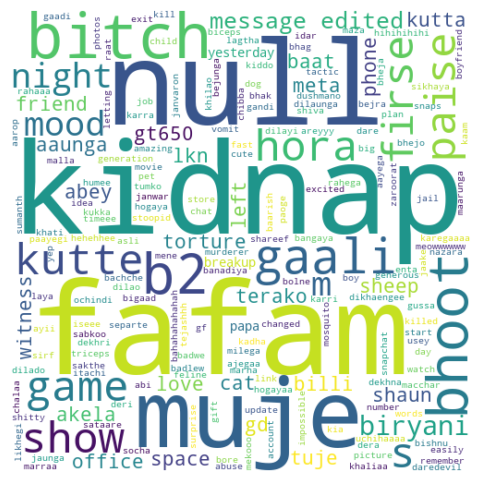

In [51]:
wc=WordCloud(width=500,height=500,min_font_size=10, background_color='white').generate(" ".join(words))


plt.figure(figsize=(6, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off") 
plt.show()

In [23]:
with open(r"stopwords_hindi-english-telugu.txt",'r') as file:
    stopwords=file.read()

temp_df=df[df['user']!='group_notification']
temp_df=temp_df[temp_df['message']!='<Media omitted>\n']

words=[]
for message in temp_df['message']:
    for word in message.lower().split():
        if word not in stopwords:
            words.append(word)
    

In [25]:
with open(r"stopwords_hindi-english-telugu.txt",'r') as file:
    stopwords=file.read()

In [ ]:
print(stopwords)

In [27]:
from collections import Counter

In [113]:
[word for word in words if word not in emoji.EMOJI_DATA]

['null',
 'gaadi',
 'dilao',
 '@917330830036',
 'null',
 'baarish',
 'hora',
 'dilayi',
 'tuje',
 'dilaunga',
 'dilado',
 'b2',
 '\u200d↔️',
 'areyyy',
 '🏼\u200d',
 '️',
 'separte',
 'chat',
 'sataare',
 'exit',
 'jaunga',
 '🏻\u200d',
 '️',
 '7013460833',
 'number',
 'malla',
 'kukka',
 'ochindi',
 'bhak',
 'dog',
 'shaun',
 'sheep',
 'shaun',
 'sheep',
 'kadha',
 'show',
 'yep',
 'love',
 'show',
 'generation',
 'show',
 'b2',
 'meowwwwww',
 'cute',
 'bangaya',
 'b2',
 'bhoot',
 'dekhna',
 'tumko',
 'bhoot',
 'bhoot',
 'office',
 'movie',
 'dekhri',
 'idar',
 'bahahahahahah',
 'asli',
 'bhoot',
 'remember',
 'day',
 'gf',
 'rahega',
 '<',
 'message',
 'edited',
 '>',
 'picture',
 'bishnu',
 'muje',
 'khilao',
 'akela',
 'akela',
 'khati',
 'khaliaa',
 'pet',
 'vomit',
 '@917674848060',
 '@917660836415',
 'bore',
 'marraa',
 'karri',
 'kidnap',
 'kia',
 'kidnap',
 'kidnap',
 '🏻\u200d',
 '️',
 'bhag',
 'paayegi',
 'biceps',
 'paoge',
 'kidnap',
 'triceps',
 'aaunga',
 'kutte',
 'aaunga'

In [112]:
df=pd.DataFrame(Counter(words).most_common(20))
df[1]

0     21
1     19
2     14
3      9
4      8
5      8
6      7
7      6
8      6
9      6
10     6
11     6
12     5
13     5
14     5
15     5
16     5
17     5
18     4
19     4
Name: 1, dtype: int64

In [76]:
!pip install emoji

Defaulting to user installation because normal site-packages is not writeable
  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
Using cached emoji-2.14.1-py3-none-any.whl (590 kB)


In [85]:
import emoji
dir(emoji)

['EMOJI_DATA',
 'EmojiMatch',
 'EmojiMatchZWJ',
 'EmojiMatchZWJNonRGI',
 'LANGUAGES',
 'STATUS',
 'Token',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__email__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__source__',
 '__spec__',
 '__version__',
 'analyze',
 'config',
 'core',
 'demojize',
 'distinct_emoji_list',
 'emoji_count',
 'emoji_list',
 'emojize',
 'get_emoji_by_name',
 'is_emoji',
 'load_from_json',
 'purely_emoji',
 'replace_emoji',
 'tokenizer',
 'unicode_codes',
 'version']

In [91]:
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA.keys()])
pd.DataFrame(Counter(emojis).most_common(20))

,0,1
0,🐕,21
1,😂,19
2,😒,14
3,🐃,9
4,😡,8
5,🏻,8
6,😑,8
7,🤣,7
8,🤭,6
9,🤬,6


In [92]:
df

,date,user,message,year,month,day,hour,minute
0,2025-02-05 00:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2025,February,5,0,9
1,2025-02-05 12:30:00,Bksahu,null\n,2025,February,5,12,30
2,2025-02-05 17:04:00,Shiva Sai Srinivas Billa,Ye wala gaadi dilao @917330830036\n,2025,February,5,17,4
3,2025-02-05 17:04:00,Shiva Sai Srinivas Billa,null\n,2025,February,5,17,4
4,2025-02-05 17:05:00,Bksahu,Baarish hora ab😱\n,2025,February,5,17,5
...,...,...,...,...,...,...,...,...
358,2025-02-17 15:23:00,Shiva Sai Srinivas Billa,Kab Diya\n,2025,February,17,15,23
359,2025-02-17 15:24:00,Bksahu,Yee\n,2025,February,17,15,24
360,2025-02-17 15:33:00,Shiva Sai Srinivas Billa,No\n,2025,February,17,15,33
361,2025-02-17 15:34:00,Bksahu,What no\n,2025,February,17,15,34


In [102]:
temp=df.groupby(['year','month'])['message'].count().reset_index()

time=[]
for i in range(temp.shape[0]):
    time.append(temp['month'][i]+'-'+str(temp['year'][i]))
temp['time']=time

In [105]:
temp

,year,month,message,time
0,2025,February,363,February-2025


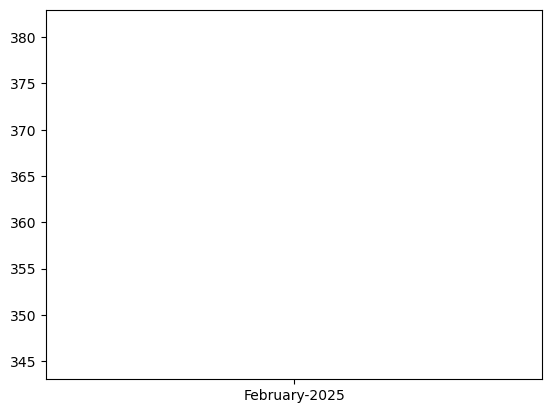

In [108]:
plt.plot(temp['time'],temp['message'])